In [1]:
## QUESTION 1 ##
1 - Traitement des données
2 - Différents nombres possibles
## QUESTION 2 ##
1 - Nombre de pas total
2 - Nombre de pas par personne
3 - Nombre de pas par catégorie pré-confinement
## QUESTION 3 ##
1 - Chopper les coordonnées et regarder dans quels départements il est fonction de la date pour chaque customer_id
2 - Déterminer la date du confinement ou les plages de dates de confinement
Dates : 17 mars 2020 - 11 mai 2020 sous date format : 17/03/2020 - 11/05/2020
## QUESTION 4 ##
1 - Qui a changé de département ?
2 - Combien ça fait en tout ? 
3 - Combien ça fait par département de départ ?
4 - Combien ça fait par département d'arrivée ? 
## QUESTION 5 ##
Le département avec le plus de départs
## QUESTION 6 ##
Le département avec le plus d'arrivées ? 
Le département avec le plus de (arrivées-départ) ?

### Intro ###

## Packages ##
USE_PYGEOS=1
import pandas as pd
import fiona
pd.options.display.max_rows = 100
import geopandas as gpd
import numpy as np
import sklearn
import matplotlib.pyplot as plt


## Data Import ##
location_df = pd.read_csv("location_01-03_01-04.csv", sep = ";")
steps_df = pd.read_csv("step_summary_01-03_01-04.csv", sep = ";")
departments_df = gpd.read_file("departements.geojson", sep = ";")


# Visualization #
steps_df.head()
location_df.head()
departments_df.head()

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Number of customers in location_df with NaN 195704
Number of customers in steps_df with NaN 186705
There are  31  NaN values
There are  0  NaN values


/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_33933/3539007978.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_df_not_nan["customer_id"] = location_df_not_nan["customer_id"].apply(lambda x : int(x) )


# QUESTION 1

In [ ]:
# Number of customers used for this study
''' We consider customers without ID not valid. Neither do we use customers
which are not in the inner join of both customer_id, steps and location. We'll use them 
in further study.'''

number_of_customers_location = len(location_df["customer_id"].unique())
number_of_customers_steps = len(steps_df["customer_id"].unique())
print("Number of customers in location_df with NaN", number_of_customers_location)
print("Number of customers in steps_df with NaN", number_of_customers_steps)


##### Join customer_ids of both dataframes
#### Change customer_id to int in location_df ####

location_df.columns = ['customer_id', 'created_at', 'latitude', 'longitude']

### NaN values ###

## non-identified customers in location_df - 31
print('There are ', len(location_df[location_df['customer_id'].isna()]), ' NaN values')
## non-identified customers in steps_df - 0
print('There are ', len(steps_df[steps_df['customer_id'].isna()]), ' NaN values')


### Remove NaN for conversion ###

location_df_nan = location_df[location_df['customer_id'].isna()]
location_df_not_nan = location_df[location_df['customer_id'].isna() == False]

### Converting to int in order to join on columns with the same data type###
location_df_not_nan["customer_id"] = location_df_not_nan["customer_id"].apply(lambda x : int(x) )
### Re-add NaN values ###
location_df = pd.concat([location_df_nan, location_df_not_nan])
### Customer_ids to join ###

## Unique customer_ids ##
steps_customers = pd.Series(steps_df["customer_id"].unique())
location_customers_not_nan = pd.Series(location_df_not_nan["customer_id"].unique())

## Conversion to dataframes for the join ##
steps_customers = steps_customers.to_frame()
location_customers_not_nan = location_customers_not_nan.to_frame()


In [102]:
## Passing index as customer_id for the join ##
steps_customers.columns = ['index']
steps_customers = steps_customers.set_index('index')
steps_customers['customers'] = steps_customers.index
location_customers_not_nan.columns = ['index']
location_customers_not_nan = location_customers_not_nan.set_index('index')
location_customers_not_nan['customers'] = location_customers_not_nan.index

In [103]:
## Full Join ##
customers = steps_customers.join(location_customers_not_nan,how = 'outer', lsuffix = '_steps', rsuffix = '_location')


In [104]:
## Number of customers in both, NaN excluded ##
customers_not_in_location = customers[customers['customers_location'].isna()]
customers_not_in_steps = customers[customers['customers_steps'].isna()]
N1 = len(customers_not_in_location)
N2 = len(customers_not_in_steps)
N3 = len(customers)-len(customers_not_in_steps)-len(customers_not_in_location)
print('Number of customers in steps not in location ', N1)
print('Number of customers in location not in steps ', N2)
print('Number of customers in both, NaN excluded ', N3)

Number of customers in steps not in location  10314
Number of customers in location not in steps  19312
Number of customers in both, NaN excluded  176391


In [105]:
#Visualize steps_df
pd.options.display.max_rows = 1000
steps_df.head(n=1000)

,customer_id,created_at,amount
0,645885,2020-03-15,301
1,233208,2020-03-06,2496
2,504747,2020-03-15,883
3,644856,2020-03-15,928
4,532439,2020-03-06,486
5,140026,2020-03-15,74
6,252862,2020-03-15,254
7,639894,2020-03-06,138
8,554576,2020-03-15,90
9,624478,2020-03-06,1093


In [106]:
#Groupby steps_df customer_id in order to see the range of amount of days one customer logs
steps_df.groupby('customer_id').count()

,created_at,amount
customer_id,,
5,17,17
15,21,21
21,23,23
34,4,4
42,11,11
...,...,...
685668,1,1
685670,1,1
685680,1,1


        customer_id  created_at  amount
859804       341570  2020-03-02       1
904401       160502  2020-03-02       1
846340       658394  2020-03-02       1
829935       584837  2020-03-02       1
869168       107603  2020-03-02       1
...             ...         ...     ...
205961       330311  2020-03-02   64468
204116       633080  2020-03-02   72552
896975       542057  2020-03-02   77601
904683       151883  2020-03-02   81696
875806       367799  2020-03-02   91587

[86134 rows x 3 columns]
[    0  1000  2000  3000  4000  5000  6000  7000  8000  9000 10000 11000
 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000
 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000
 36000 37000 38000 39000 40000 41000 42000 43000 44000 45000 46000 47000
 48000 49000 50000 51000 52000 53000 54000 55000 56000 57000 58000 59000
 60000 61000 62000 63000 64000 65000 66000 67000 68000 69000 70000 71000
 72000 73000 74000 75000 76000 77000 78000 79000 80000 8

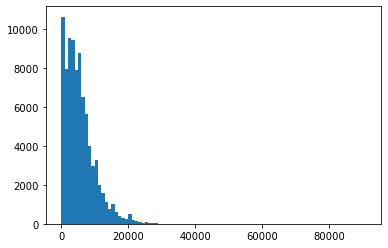

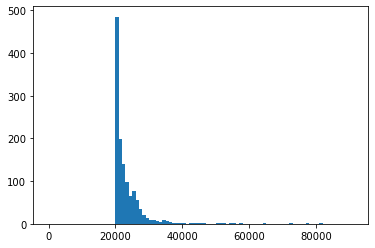

In [142]:
##Repartition for one day
'''Suppose one day is approximately like the others in terms of overall repartition 
- this is something to check for instance weekend versus week-days'''

##Select one day
date = '2020-03-02'
steps_date = steps_df[steps_df['created_at'] == date].sort_values('amount')

##Repartition of amounts in 1000 bins
bins_ran = np.arange(stop = max(steps_date['amount'].tolist()), step = 1000)
plt.figure()
plt.hist(steps_date['amount'].tolist(), bins = bins_ran )
plt.show()

##Repartition of extremes > 20000 steps a day
steps_date_extremes = steps_date[steps_date['amount'] > 20000]
bins_ran = np.arange(stop = max(steps_date_extremes['amount'].tolist()), step = 1000)
plt.figure()
plt.hist(steps_date_extremes['amount'].tolist(), bins = bins_ran )
plt.show()

In [144]:
## Does the choice of 20000 make sense ?
print('total number of customers in steps', len(steps_df['customer_id'].unique()))
print('standard deviation for the steps_date distribution', np.std(steps_date['amount'].unique())
print('total number of customers who have logged more than 20000 steps', len(steps_date_extremes['customer_id'].unique()))
print('Already satisfied because 0.1 percent of the number of customers : 1867')
## It would even be possible to reduce more the number of steps

186705


6543.550481527243

In [171]:
## Selection of the people logging less than 20000 a day
steps_df_dist = steps_df[steps_df['amount'] < 20000]

<Figure size 432x288 with 0 Axes>

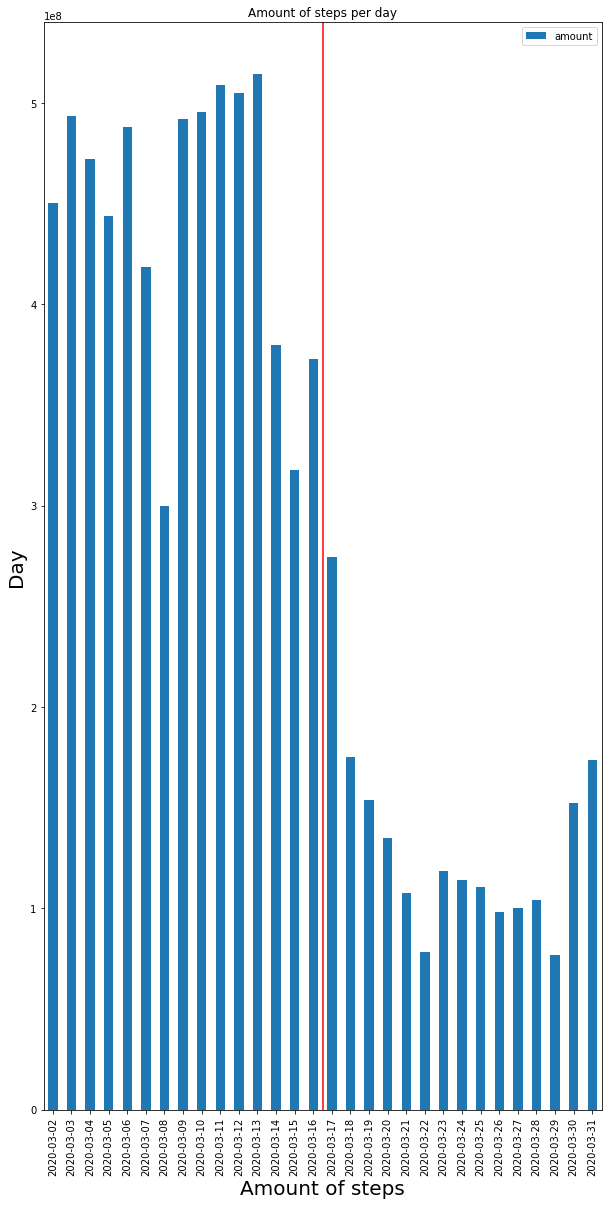

In [172]:
## Evolution of the total amount of steps
%matplotlib inline
steps_per_day = steps_df_dist.groupby('created_at')['amount'].sum()
steps_per_day = steps_per_day.to_frame()
steps_per_day['created at'] = steps_per_day.index
steps_per_day = steps_per_day.sort_values('created at', ascending = True)
steps_per_day['amount'] = steps_per_day['amount'].apply(lambda x: int(x))
plt.figure()
steps_per_day.plot.bar(y = 'amount', figsize = (10, 20), title = 'Amount of steps per day', legend = 'amount of steps per day')
plt.ylabel('Day', size = 20)
plt.xlabel('Amount of steps', size =20)
plt.axvline(14.5, color = 'red')
plt.show()


<Figure size 432x288 with 0 Axes>

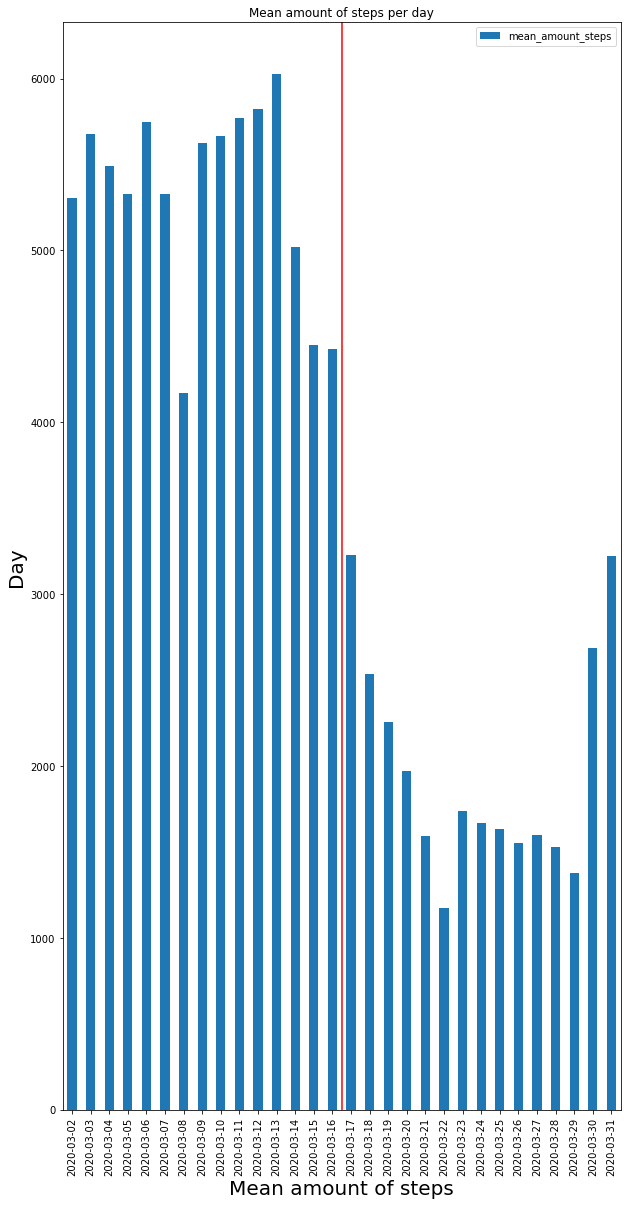

In [173]:
## Evolution of the mean amount of steps
%matplotlib inline
number_of_customers = steps_df_dist.groupby('created_at').size().reset_index(name = 'number_of_customers').sort_values(by = 'created_at', ascending = True)
number_of_customers.index = number_of_customers['created_at']
steps_per_day = steps_per_day.join(number_of_customers, on = number_of_customers['created_at'].unique(), lsuffix = '_steps')
steps_per_day['mean_amount_steps'] = steps_per_day['amount'] / steps_per_day['number_of_customers']
steps_per_day.dropna()
steps_per_day
plt.figure()
steps_per_day = steps_per_day[['mean_amount_steps', 'created_at']]
steps_per_day.plot.bar(y = 'mean_amount_steps', figsize = (10, 20), title = 'Mean amount of steps per day', legend = 'mean amount of steps per day')
plt.ylabel('Day', size = 20)
plt.xlabel('Mean amount of steps', size =20)
plt.axvline(14.5, color = 'red')
plt.show()


In [174]:
print(steps_per_day)
print(number_of_customers)
#high-drop in the number of customers
#We could wonder if there was a different pattern or repartition before and during confinement

            mean_amount_steps  created_at
created_at                               
2020-03-02        5307.806402  2020-03-02
2020-03-03        5678.109488  2020-03-03
2020-03-04        5490.362046  2020-03-04
2020-03-05        5330.492467  2020-03-05
2020-03-06        5745.076821  2020-03-06
2020-03-07        5330.927931  2020-03-07
2020-03-08        4168.123118  2020-03-08
2020-03-09        5627.944745  2020-03-09
2020-03-10        5664.696886  2020-03-10
2020-03-11        5768.359532  2020-03-11
2020-03-12        5822.390901  2020-03-12
2020-03-13        6026.334739  2020-03-13
2020-03-14        5022.127053  2020-03-14
2020-03-15        4452.425344  2020-03-15
2020-03-16        4426.512369  2020-03-16
2020-03-17        3230.030318  2020-03-17
2020-03-18        2533.985055  2020-03-18
2020-03-19        2254.288661  2020-03-19
2020-03-20        1971.429657  2020-03-20
2020-03-21        1592.380183  2020-03-21
2020-03-22        1170.617725  2020-03-22
2020-03-23        1735.019583  202

In [107]:
## to add PER DAY

# Total de pas
N = steps_df['amount'].sum()
print("Total number of steps ", N)

# Total moyen (par personne) de pas
N_customer = len(steps_df['customer_id'].unique())
Nmean = N/N_customer
print("Mean (per person) total number of steps ", Nmean)

# Total de pas par personne
N_array = steps_df.groupby('customer_id').sum().sort_values(by = 'customer_id', ascending = True)
print('Total number of steps per customer ')
print(N_array)

Total number of steps  9209880295
Mean (per person) total number of steps  49328.514474706084
Total number of steps per customer 
             amount
customer_id        
5             56774
15           225430
21           115997
34            21591
42            37330
...             ...
685668          154
685670            6
685680            8
685683           11
685687           18

[186705 rows x 1 columns]


In [108]:
# Check if there are twice same date, same person
N_x_log_i = steps_df[['customer_id', 'created_at']].groupby(['customer_id','created_at']).size().reset_index(name='counts')
N_x_log = N_x_log_i[N_x_log_i['counts'] > 1]
# Conclusion only one log a day

In [109]:
#Number of log per person
N_log_customer = steps_df[['customer_id', 'created_at']].groupby(['customer_id']).size().reset_index(name='logs').sort_values(by='customer_id')
N_N_logs = N_log_customer.groupby('logs').size().sort_values(ascending = True).reset_index(name = 'number of people with x logs')
N_N_logs    

,logs,number of people with x logs
0,29,4300
1,27,4310
2,24,4316
3,25,4338
4,21,4357
5,22,4363
6,28,4366
7,23,4407
8,20,4450
9,19,4453


# # # Repartition on the whole period

In [110]:
# Mean number per person per day with number of day
N_mean_day = pd.DataFrame(columns = ['customer_id', 'days', 'total_amount', 'mean_amount'])
N_mean_day['customer_id'] = N_log_customer['customer_id']
N_mean_day['total_amount'] = N_array['amount']
N_mean_day['days'] = N_log_customer['logs']
N_mean_day['mean_amount'] = N_mean_day['total_amount']/N_mean_day['days']
N_sign = N_mean_day[(N_mean_day['days']>1)&(N_mean_day['total_amount'].notnull())]
print(len(N_sign))
N_sign

29580


,customer_id,days,total_amount,mean_amount
21,174,4,115997.0,28999.250000
34,328,3,21591.0,7197.000000
42,526,23,37330.0,1623.043478
65,961,30,9719.0,323.966667
67,973,5,8910.0,1782.000000
...,...,...,...,...
186374,685084,2,897.0,448.500000
186381,685091,2,180.0,90.000000
186383,685093,2,124228.0,62114.000000
186400,685131,2,18019.0,9009.500000


In [111]:
print("Max and min total_amount ", max(N_sign['total_amount'].tolist()),'/',  min(N_sign['total_amount'].tolist()))
print("Max and min mean_amount ", max(N_sign['mean_amount'].tolist()), '/', min(N_sign['mean_amount'].tolist()))

Max and min total_amount  560915.0 / 1.0
Max and min mean_amount  248455.0 / 0.045454545454545456


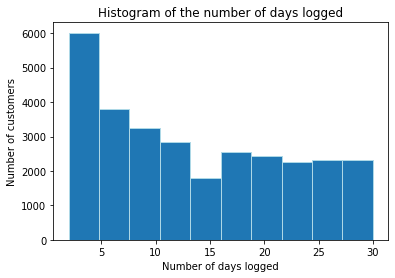

In [112]:
#Repartition of the number of days logged (one day = one log as seen previously)
%matplotlib inline
plt.figure()
plt.hist(N_sign['days'], edgecolor = "lightblue")
plt.title("Histogram of the number of days logged")
plt.ylabel("Number of customers")
plt.xlabel("Number of days logged")
plt.show(block = False)

<ipython-input-113-33b93d244c0b>:9: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', basey=2)


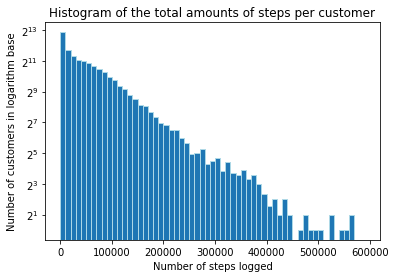

In [113]:
#Repartition of the total amount walked per customer
%matplotlib inline
bins_ran = np.arange(stop = 600000, step = 10000)
plt.figure()
plt.hist(N_sign['total_amount'].tolist(), bins = bins_ran, edgecolor = "lightblue", )
plt.title("Histogram of the total amounts of steps per customer")
plt.ylabel("Number of customers in logarithm base")
plt.xlabel("Number of steps logged")
plt.yscale('log', basey=2)
plt.show(block = False)

<ipython-input-114-99947dfe328c>:9: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', basey=2)


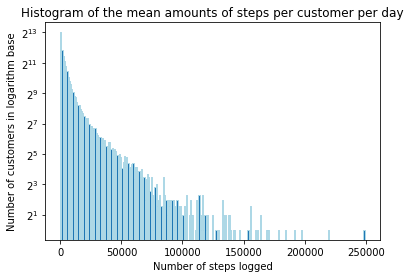

In [114]:
#Repartition of the mean amount walked per customer per day walked (over the duration inherent to the customer)
%matplotlib inline
bins_ran = np.arange(stop = 250000, step = 1000)
plt.figure()
plt.hist(N_sign['mean_amount'].tolist(), bins = bins_ran, edgecolor = "lightblue", )
plt.title("Histogram of the mean amounts of steps per customer per day")
plt.ylabel("Number of customers in logarithm base")
plt.xlabel("Number of steps logged")
plt.yscale('log', basey=2)
plt.show(block = False)

In [115]:
# Total de pas par catégorie pré-confinement, during, ##post(total, par personne, par catégorie)
print("Date span of the study for location_df" , location_df['created_at'].sort_values(ascending = True).unique())
print("Date span of the study for steps_df" , steps_df['created_at'].sort_values(ascending = True).unique())
print("There is only the months of March to consider")

from datetime import datetime as dt
steps_pré = steps_df[
    steps_df['created_at'].apply(lambda x : dt.strptime(x,"%Y-%m-%d")) < dt.strptime('17/03/2020', "%d/%m/%Y")
].sort_values(by = 'customer_id', ascending = True)
steps_during = steps_df[
    (steps_df['created_at'].apply(lambda x : dt.strptime(x,"%Y-%m-%d")) >= dt.strptime('17/03/2020', "%d/%m/%Y"))].sort_values(by = 'customer_id', ascending = True)

#This would be of use if we had further data
    #&
    #(steps_df['created_at'].apply(lambda x : dt.strptime(x,"%Y-%m-%d")) < dt.strptime('11/05/2020', "%d/%m/%Y"))
#steps_post = steps_df[
    #steps_df['created_at'].apply(lambda x : dt.strptime(x,"%Y-%m-%d")) >= dt.strptime('11/05/2020', "%d/%m/%Y")
#].sort_values(by = 'customer_id', ascending = True)

Date span of the study for location_df ['2020-03-01' '2020-03-02' '2020-03-03' '2020-03-04' '2020-03-05'
 '2020-03-06' '2020-03-07' '2020-03-08' '2020-03-09' '2020-03-10'
 '2020-03-11' '2020-03-12' '2020-03-13' '2020-03-14' '2020-03-15'
 '2020-03-16' '2020-03-17' '2020-03-18' '2020-03-19' '2020-03-20'
 '2020-03-21' '2020-03-22' '2020-03-23' '2020-03-24' '2020-03-25'
 '2020-03-26' '2020-03-27' '2020-03-28' '2020-03-29' '2020-03-30'
 '2020-03-31']
Date span of the study for steps_df ['2020-03-02' '2020-03-03' '2020-03-04' '2020-03-05' '2020-03-06'
 '2020-03-07' '2020-03-08' '2020-03-09' '2020-03-10' '2020-03-11'
 '2020-03-12' '2020-03-13' '2020-03-14' '2020-03-15' '2020-03-16'
 '2020-03-17' '2020-03-18' '2020-03-19' '2020-03-20' '2020-03-21'
 '2020-03-22' '2020-03-23' '2020-03-24' '2020-03-25' '2020-03-26'
 '2020-03-27' '2020-03-28' '2020-03-29' '2020-03-30' '2020-03-31']
There is only the months of March to consider


# # # Before confinement

In [117]:
# Mean number per person per day with number of day
N_mean_day = pd.DataFrame(columns = ['customer_id', 'days', 'total_amount', 'mean_amount'])
N_mean_day['customer_id'] = pd.Series(steps_pré['customer_id'].sort_values(ascending =True).unique())
N_mean_day['total_amount'] = steps_pré.sort_values('customer_id', ascending = True).groupby('customer_id').sum()['amount']
N_mean_day['days'] = steps_pré.sort_values('customer_id', ascending = True).groupby('customer_id').size().reset_index(name = 'days')['days']
N_mean_day['mean_amount'] = N_mean_day['total_amount']/N_mean_day['days']
N_sign = N_mean_day[(N_mean_day['days']>1)&(N_mean_day['total_amount'].notnull())]
print("Number of customers before confinement", len(N_sign))
N_sign

Number of customers before confinement 22330


,customer_id,days,total_amount,mean_amount
15,143,13,168675.0,12975.000000
21,204,3,109769.0,36589.666667
34,415,15,21591.0,1439.400000
42,616,6,36600.0,6100.000000
65,1029,2,9719.0,4859.500000
...,...,...,...,...
162639,674868,2,116472.0,58236.000000
162641,674870,2,82336.0,41168.000000
162651,674880,2,5931.0,2965.500000
162652,674881,2,4001.0,2000.500000


In [118]:
print("Max and min total_amount ", max(N_sign['total_amount'].tolist()),'/',  min(N_sign['total_amount'].tolist()))
print("Max and min mean_amount ", max(N_sign['mean_amount'].tolist()), '/', min(N_sign['mean_amount'].tolist()))

Max and min total_amount  403478.0 / 1.0
Max and min mean_amount  141956.5 / 0.07142857142857142


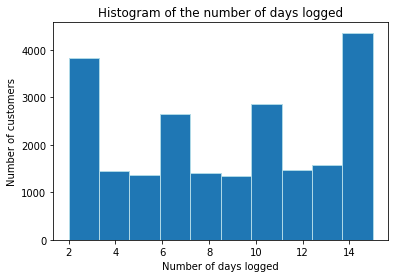

In [119]:
#Repartition of the number of days logged (one day = one log as seen previously) on a 16 days period
%matplotlib inline
plt.figure()
plt.hist(N_sign['days'], edgecolor = "lightblue")
plt.title("Histogram of the number of days logged")
plt.ylabel("Number of customers")
plt.xlabel("Number of days logged")
plt.show(block = False)

<ipython-input-120-84fbd5d079a8>:9: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', basey=2)


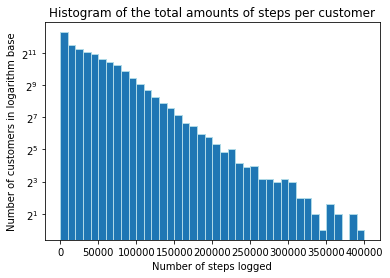

In [120]:
#Repartition of the total amount walked per customer / 16 days period
%matplotlib inline
bins_ran = np.arange(stop = 405000, step = 10000)
plt.figure()
plt.hist(N_sign['total_amount'].tolist(), bins = bins_ran, edgecolor = "lightblue", )
plt.title("Histogram of the total amounts of steps per customer")
plt.ylabel("Number of customers in logarithm base")
plt.xlabel("Number of steps logged")
plt.yscale('log', basey=2)
plt.show(block = False)

<ipython-input-121-f2f1f0de6ea0>:9: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', basey=2)


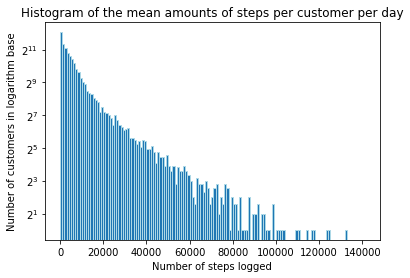

In [121]:
#Repartition of the mean amount walked per customer per day walked (over the duration inherent to the customer) / 16 days period
%matplotlib inline
bins_ran = np.arange(stop = 142000, step = 1000)
plt.figure()
plt.hist(N_sign['mean_amount'].tolist(), bins = bins_ran, edgecolor = "lightblue", )
plt.title("Histogram of the mean amounts of steps per customer per day")
plt.ylabel("Number of customers in logarithm base")
plt.xlabel("Number of steps logged")
plt.yscale('log', basey=2)
plt.show(block = False)

# # # During confinement

In [122]:
# Mean number per person per day with number of day
N_mean_day = pd.DataFrame(columns = ['customer_id', 'days', 'total_amount', 'mean_amount'])
N_mean_day['customer_id'] = pd.Series(steps_during['customer_id'].sort_values(ascending =True).unique())
N_mean_day['total_amount'] = steps_during.sort_values('customer_id', ascending = True).groupby('customer_id').sum()['amount']
N_mean_day['days'] = steps_during.sort_values('customer_id', ascending = True).groupby('customer_id').size().reset_index(name = 'days')['days']
N_mean_day['mean_amount'] = N_mean_day['total_amount']/N_mean_day['days']
N_sign = N_mean_day[(N_mean_day['days']>1)&(N_mean_day['total_amount'].notnull())]
print("Number of customers during confinement", len(N_sign), ' Fewer customers logged')
print('We could also add the NaN values to the study')
N_sign

Number of customers during confinement 17440  Fewer customers logged
We could also add the NaN values to the study


,customer_id,days,total_amount,mean_amount
5,77,2,28207.0,14103.500000
15,170,14,56755.0,4053.928571
42,680,14,730.0,52.142857
75,1297,14,1782.0,127.285714
77,1338,13,376.0,28.923077
...,...,...,...,...
148727,685097,2,3805.0,1902.500000
148729,685105,2,11255.0,5627.500000
148732,685112,2,7387.0,3693.500000
148740,685129,2,18745.0,9372.500000


In [123]:
print("Max and min total_amount ", max(N_sign['total_amount'].tolist()),'/',  min(N_sign['total_amount'].tolist()))
print("Max and min mean_amount ", max(N_sign['mean_amount'].tolist()), '/', min(N_sign['mean_amount'].tolist()))

Max and min total_amount  318427.0 / 2.0
Max and min mean_amount  159213.5 / 0.13333333333333333


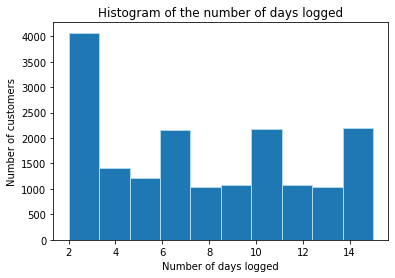

Different repartition, with same peaks at 2, 6, 10 and 14


In [124]:
#During : Repartition of the number of days logged (one day = one log as seen previously) on a 16 days period
%matplotlib inline
plt.figure()
plt.hist(N_sign['days'], edgecolor = "lightblue")
plt.title("Histogram of the number of days logged")
plt.ylabel("Number of customers")
plt.xlabel("Number of days logged")
plt.show(block = False)
print("Different repartition, with same peaks at 2, 6, 10 and 14")

<ipython-input-125-12f77f746988>:9: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', basey=2)


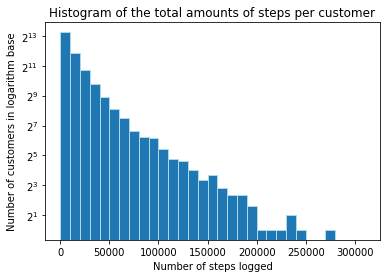

More peaked repartition around the fewer steps


In [125]:
#Repartition of the total amount walked per customer / 16 days period
%matplotlib inline
bins_ran = np.arange(stop = 320000, step = 10000)
plt.figure()
plt.hist(N_sign['total_amount'].tolist(), bins = bins_ran, edgecolor = "lightblue", )
plt.title("Histogram of the total amounts of steps per customer")
plt.ylabel("Number of customers in logarithm base")
plt.xlabel("Number of steps logged")
plt.yscale('log', basey=2)
plt.show(block = False)
print("More peaked repartition around the fewer steps")

<ipython-input-126-36eff56b8380>:9: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', basey=2)


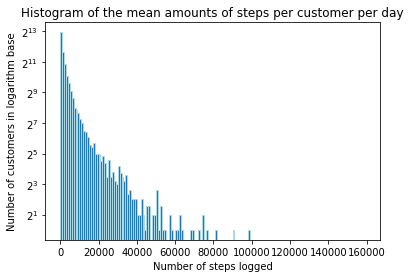

More peaked repartition around the fewer steps
It would be worth it looking into 0 to 6000 steps if business-wise it made sense


In [126]:
#Repartition of the mean amount walked per customer per day walked (over the duration inherent to the customer) / 16 days period
%matplotlib inline
bins_ran = np.arange(stop = 160000, step = 1000)
plt.figure()
plt.hist(N_sign['mean_amount'].tolist(), bins = bins_ran, edgecolor = "lightblue", )
plt.title("Histogram of the mean amounts of steps per customer per day")
plt.ylabel("Number of customers in logarithm base")
plt.xlabel("Number of steps logged")
plt.yscale('log', basey=2)
plt.show(block = False)
print("More peaked repartition around the fewer steps")
print("It would be worth it looking into 0 to 6000 steps if business-wise it made sense")

# Question 3

In [30]:
####First Solution
#Point is (longitude, latitude)
# Function making geopandas points of latitude, longitude
from shapely.geometry import Point, Polygon
def f(x):    
   return Point(x[3],x[2])
location_df['Points'] = location_df.apply(f, axis = 1)

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [ ]:
USE_PYGEOS=1

import pyproj
import shapely
import pandas as pd
pd.options.display.max_rows = 100
import geopandas as gpd
import numpy as np
import sklearn
import matplotlib.pyplot as plt


gpd.show_versions()
print(gpd.options.use_pygeos)

location_df = pd.read_csv("location_01-03_01-04.csv", sep = ";")

import rtree
import pygeos

gpd.options.use_pygeos = True
#Point is (longitude, latitude)
# Function making geopandas points of latitude, longitude
location_geo = gpd.GeoDataFrame(location_df, crs = 'EPSG:4326', geometry = gpd.points_from_xy(location_df.longitude, location_df.latitude))

departments_df = gpd.read_file("departements.geojson", sep = ";")
print(departments_df)
import time
start = time.time()
print("hello")
import geopandas
import rtree

# Function to check wether a department contains a position - returns the department of the position. NaN values are probably in another country
dept_points = geopandas.sjoin(location_geo, departments_df)
end = time.time()
print(end-start, ' s')
print(dept_points)


In [ ]:
departments_dfstar = dept_points

In [181]:
#### First solution
#Point is (longitude, latitude)
# Function making geopandas points of latitude, longitude
import time

start = time.time()
print("hello")

from shapely.geometry import Point, Polygon
def f(x):    
   return Point(x[3],x[2])
location_df['Points'] = location_df.apply(f, axis = 1)

end = time.time()
print(end-start, ' s')

hello


/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


98.53981590270996  s


In [105]:
#Save location_df with points for further study - overwrites by default
location_geo.to_csv('location_df_with_points.csv')

In [74]:
####First Solution
# Function to check wether a department contains a position - returns the department of the position. NaN values are probably in another country
from shapely.geometry import Point, Polygon
def in_polygon(x):
    dep = 'NaN'
    for polygon in departments_df['geometry'].tolist():
        if polygon.contains(x[4]):
            dep = departments_df['code'][departments_df['geometry'] == polygon].item()
            return dep
            break

In [106]:
#How many records do we have to deal with ? 
print('How many records do we have to deal with ? ', len(location_geo))

2396949


In [76]:
#### First solution : On sample, because runtime of this query approximates 60 hours for the whole df
import time

start = time.time()
print("hello")

short_location_df = location_df[location_df['customer_id'].notna()].sort_values('customer_id', ascending = True).head(500000)
short_location_df['department'] = short_location_df.head(500000).apply(in_polygon, axis = 1)

end = time.time()
print(end - start)

hello
4830.55704498291


In [77]:
####First Solution
# Drop useless columns
short_location_df.drop('latitude', axis = 1, inplace = True)
short_location_df.drop('longitude', axis = 1,  inplace = True)
short_location_df.drop('Points', axis = 1, inplace = True)

In [78]:
short_location_df

,customer_id,created_at,department
0,5.0,2020-03-01,75
1713137,5.0,2020-03-22,75
2326100,5.0,2020-03-31,75
338905,5.0,2020-03-05,14
1918741,5.0,2020-03-25,75
...,...,...,...
97488,189889.0,2020-03-02,87
2000878,189889.0,2020-03-26,87
945023,189889.0,2020-03-12,87
1115042,189889.0,2020-03-14,87


In [79]:
#How many people in the sample
print(len(short_location_df['customer_id'].unique()), 'people in the sample')
print(len(location_df['customer_id'].unique())-1, 'people in total')

37115 people in the sample
195703 people in total


In [80]:
# Split before and during confinement
short_location_df_before = short_location_df[short_location_df['created_at'].apply(lambda x : dt.strptime(x,"%Y-%m-%d")) < dt.strptime('17/03/2020', "%d/%m/%Y")]
short_location_df_during = short_location_df[short_location_df['created_at'].apply(lambda x : dt.strptime(x,"%Y-%m-%d")) >= dt.strptime('17/03/2020', "%d/%m/%Y")]

# Other solution

In [108]:
print(departments_dfstar)

         customer_id  created_at   latitude  longitude  \
0                5.0  2020-03-01  48.867272   2.276820   
2               21.0  2020-03-01  48.886921   2.357110   
4               82.0  2020-03-01  48.849043   2.294496   
6              102.0  2020-03-01  48.864063   2.382560   
18             283.0  2020-03-01  48.835750   2.396892   
...              ...         ...        ...        ...   
2391968     668786.0  2020-03-31  46.104979   2.512039   
2392083     669211.0  2020-03-31  45.907720   2.388970   
2394624     679750.0  2020-03-31  46.082328   2.146255   
2395576     682889.0  2020-03-31  46.251617   1.762176   
2395868     683694.0  2020-03-31  46.178458   1.878492   

                         geometry  index_right code     nom  
0        POINT (2.27682 48.86727)           36   75   Paris  
2        POINT (2.35711 48.88692)           36   75   Paris  
4        POINT (2.29450 48.84904)           36   75   Paris  
6        POINT (2.38256 48.86406)           36   75   P

In [109]:
short_location_df = departments_dfstar.copy()

In [114]:
from datetime import datetime as dt

In [117]:
# Split before and during confinement
start = time.time()
print('hello')

short_location_df_before = short_location_df[short_location_df['created_at'].apply(lambda x : dt.strptime(x,"%Y-%m-%d")) < dt.strptime('17/03/2020', "%d/%m/%Y")]
short_location_df_during = short_location_df[short_location_df['created_at'].apply(lambda x : dt.strptime(x,"%Y-%m-%d")) >= dt.strptime('17/03/2020', "%d/%m/%Y")]

end = time.time()
print(end - start, ' s')

hello
29.69652509689331  s


In [161]:
departments_before = short_location_df_before.groupby(['customer_id', 'nom']).size().reset_index(name = 'count').drop('count', axis = 1).groupby('customer_id').size().reset_index(name = 'count')

print("People who are in various departments before confinement " , len(departments_before[departments_before['count'] > 1]))

departments_during = short_location_df_during.groupby(['customer_id', 'nom']).size().reset_index(name = 'count').drop('count', axis = 1).groupby('customer_id').size().reset_index(name = 'count')
      
print("People who are in various departments during confinement " , len(departments_during[departments_during['count']>1]))



People who are in various departments before confinement  39889
People who are in various departments during confinement  5667


In [164]:
start = time.time()
print('hello')
main_dpt_before = short_location_df_before.groupby(['customer_id', 'nom']).size().reset_index(name = 'count')
main_dpt_before_count = main_dpt_before.groupby('customer_id')['count'].max().reset_index(name = 'max')
Main_Dep_before = pd.DataFrame(columns = ['customer_id','main_dep_before'])
i=0
for customer_id in main_dpt_before['customer_id'].unique():
    A = main_dpt_before[main_dpt_before['customer_id'] == customer_id] #array for customer_id
    B = main_dpt_before_count[main_dpt_before_count['customer_id'] == customer_id]['max'].values #value of max count
    C = A['nom'][A['count'] == B[0]].values[0]
    D = pd.DataFrame({'customer_id': [customer_id], 'main_dep_before': [C]})
    Main_Dep_before = pd.concat([Main_Dep_before,D], ignore_index = True, axis = 0)
    i = i + 1
end = time.time()
print(end - start, ' s')    

hello
363.81009697914124  s


In [165]:
print(Main_Dep_before)

       customer_id    main_dep_before
0              5.0              Paris
1             15.0  Seine-Saint-Denis
2             21.0     Seine-et-Marne
3             34.0              Paris
4             42.0              Paris
...            ...                ...
165813    675727.0              Paris
165814    675728.0            Gironde
165815    675729.0             Sarthe
165816    675730.0   Loire-Atlantique
165817    675731.0               Tarn

[165818 rows x 2 columns]


In [168]:
main_dpt_during = short_location_df_during.groupby(['customer_id', 'nom']).size().reset_index(name = 'count')
main_dpt_during_count = main_dpt_during.groupby('customer_id')['count'].max().reset_index(name = 'max')
Main_Dep_during = pd.DataFrame(columns = ['customer_id','main_dep_during'])
i=0
for customer_id in main_dpt_during['customer_id'].unique():
    A = main_dpt_during[main_dpt_during['customer_id'] == customer_id] #array for customer_id
    B = main_dpt_during_count[main_dpt_during_count['customer_id'] == customer_id]['max'].values #value of max count
    C = A['nom'][A['count'] == B[0]].values[0]
    D = pd.DataFrame({'customer_id': [customer_id], 'main_dep_during': [C]})
    Main_Dep_during = pd.concat([Main_Dep_during,D], ignore_index = True, axis = 0)
    i = i + 1
    

In [175]:
print(Main_Dep_during)

       customer_id    main_dep_during
0              5.0              Paris
1             15.0  Seine-Saint-Denis
2             21.0     Seine-et-Marne
3             42.0               Gers
4             65.0              Paris
...            ...                ...
150366    685653.0              Isère
150367    685654.0          Côte-d'Or
150368    685655.0               Eure
150369    685657.0            Essonne
150370    685658.0             Sarthe

[150371 rows x 2 columns]


# QUESTION 4/5/6

In [177]:
#Make an df with customer_id, their dept before and their department during confinement
start = time.time()
print('hello')
customer_dept = pd.DataFrame()
customer_ids = pd.Series(pd.concat([Main_Dep_before, Main_Dep_during])['customer_id'].unique())
i=0
for customer_id in customer_ids:
    if customer_id in Main_Dep_before['customer_id'].unique():
        if customer_id in Main_Dep_during['customer_id'].unique():
            A = Main_Dep_before['main_dep_before'][Main_Dep_before['customer_id'] == customer_id].values[0]
            B = Main_Dep_during['main_dep_during'][Main_Dep_during['customer_id'] == customer_id].values[0]
            C = pd.DataFrame({'customer_id': [customer_id], 'main_dep_before': [A], 'main_dep_during' : [B]})
            customer_dept = pd.concat([customer_dept, C], ignore_index = True, axis = 0)
    i = i + 1
end = time.time()
print(end-start)

hello


KeyboardInterrupt: 

In [187]:
#Join the main depts during and before in order to see which clients moved
Main_Dep_during_ = Main_Dep_during.copy()
Main_Dep_during_.index = Main_Dep_during_['customer_id']
customer_dept = Main_Dep_before.join(Main_Dep_during_, on = 'customer_id', lsuffix = '_during', rsuffix = '_before').dropna(axis = 0)
customer_dept

,customer_id_during,main_dep_before,customer_id_before,main_dep_during
0,5.0,Paris,5.0,Paris
1,15.0,Seine-Saint-Denis,15.0,Seine-Saint-Denis
2,21.0,Seine-et-Marne,21.0,Seine-et-Marne
4,42.0,Paris,42.0,Gers
5,65.0,Paris,65.0,Paris
...,...,...,...,...
165813,675727.0,Paris,675727.0,Paris
165814,675728.0,Gironde,675728.0,Gironde
165815,675729.0,Sarthe,675729.0,Sarthe
165816,675730.0,Loire-Atlantique,675730.0,Loire-Atlantique


In [192]:
print("Number of customers without logs after beginning of confinement ", len(customer_dept[customer_dept['main_dep_before'].isnull()]))
print("Number of customers", len(customer_dept), 'removing NaN values for customer_id, and people \nwho don\'t have either a department before or a department after')

Number of customers without logs after beginning of confinement  0
Number of customers 123591 removing NaN values for customer_id, and people 
who don't have either a department before or a department after


In [194]:
#df with the people who change department
customer_change = customer_dept[customer_dept['main_dep_before'] != customer_dept['main_dep_during']]
N_changes = len(customer_change)
print("Number of total moves ", N_changes)

Number of total moves  12473


In [217]:
#dfs with the number of people in each department
N_per_dpt_before = customer_dept.dropna(axis =1).groupby('main_dep_before').size().reset_index(name = 'count')
N_per_dpt_during = customer_dept.dropna(axis =1).groupby('main_dep_during').size().reset_index(name = 'count')
print(N_per_dpt_before)
print(N_per_dpt_during)
dep_dept = N_per_dpt_before.max().values[0]
dep_max_people = N_per_dpt_before.max().values[1]
arr_dept = N_per_dpt_during.max().values[0]
arr_max_people = N_per_dpt_during.max().values[1]
print('Department with the most absolute departures ',dep_dept, ' with ', dep_max_people, 'people')
print('Department with the most absolute arrivals ', arr_dept, ' with ', arr_max_people, 'people')

            main_dep_before  count
0                       Ain    900
1                     Aisne    843
2                    Allier    459
3           Alpes-Maritimes   2357
4   Alpes-de-Haute-Provence    169
5                  Ardennes    416
6                   Ardèche    292
7                    Ariège    173
8                      Aube    517
9                      Aude    634
10                  Aveyron    317
11                 Bas-Rhin   2088
12         Bouches-du-Rhône   3511
13                 Calvados   1340
14                   Cantal    132
15                 Charente    442
16        Charente-Maritime   1071
17                     Cher    442
18                  Corrèze    275
19             Corse-du-Sud    124
20                   Creuse    104
21                Côte-d'Or   1299
22            Côtes-d'Armor    642
23              Deux-Sèvres    469
24                 Dordogne    460
25                    Doubs    726
26                    Drôme    691
27                  

In [218]:
#Bilan comptable
N_comptable = pd.DataFrame()
N_comptable['nom'] = N_per_dpt_during['main_dep_during']
N_comptable['da'] = N_per_dpt_during['count']-N_per_dpt_before['count']
N_comptable['ad'] = N_per_dpt_before['count']-N_per_dpt_during['count']
print("On peut voir sur ce tableau")
print(N_comptable)
print("The department with the most relative arrivals ")
print(N_comptable[['nom', 'da']][N_comptable['da'] == max(N_comptable['da'])].to_string(index = False))
print("The department with the most relative departures ")
print(N_comptable[['nom', 'ad']][N_comptable['ad'] == max(N_comptable['ad'])].to_string(index = False))

On peut voir sur ce tableau
                        nom    da    ad
0                       Ain   132  -132
1                     Aisne   109  -109
2                    Allier    29   -29
3           Alpes-Maritimes   -58    58
4   Alpes-de-Haute-Provence    17   -17
5                  Ardennes    46   -46
6                   Ardèche    41   -41
7                    Ariège    33   -33
8                      Aube    25   -25
9                      Aude    63   -63
10                  Aveyron    60   -60
11                 Bas-Rhin   -78    78
12         Bouches-du-Rhône   -51    51
13                 Calvados   -39    39
14                   Cantal    20   -20
15                 Charente    37   -37
16        Charente-Maritime    40   -40
17                     Cher    34   -34
18                  Corrèze    31   -31
19             Corse-du-Sud     5    -5
20                   Creuse    16   -16
21                Côte-d'Or   -56    56
22            Côtes-d'Armor    84   -84
23          

In [206]:
customer_change

,customer_id_during,main_dep_before,customer_id_before,main_dep_during
4,42.0,Paris,42.0,Gers
8,77.0,Gard,77.0,Hauts-de-Seine
9,80.0,Paris,80.0,Yvelines
11,82.0,Paris,82.0,Charente-Maritime
13,102.0,Paris,102.0,Vaucluse
...,...,...,...,...
165517,675354.0,Loire-Atlantique,675354.0,Morbihan
165629,675494.0,Bouches-du-Rhône,675494.0,Gard
165654,675523.0,Paris,675523.0,Alpes-Maritimes
165681,675555.0,Pyrénées-Atlantiques,675555.0,Haute-Garonne


In [207]:
customer_dept

,customer_id_during,main_dep_before,customer_id_before,main_dep_during
0,5.0,Paris,5.0,Paris
1,15.0,Seine-Saint-Denis,15.0,Seine-Saint-Denis
2,21.0,Seine-et-Marne,21.0,Seine-et-Marne
4,42.0,Paris,42.0,Gers
5,65.0,Paris,65.0,Paris
...,...,...,...,...
165813,675727.0,Paris,675727.0,Paris
165814,675728.0,Gironde,675728.0,Gironde
165815,675729.0,Sarthe,675729.0,Sarthe
165816,675730.0,Loire-Atlantique,675730.0,Loire-Atlantique


In [199]:
#for arrivals - sum of people before / sum of people after
number_of_departures = customer_change.groupby('main_dep_before').size().reset_index(name = 'number of departures')
number_of_arrivals = customer_change.groupby('main_dep_during').size().reset_index(name = 'number of arrivals')
print(number_of_departures)
print(number_of_arrivals)
print(number_of_departures[['main_dep_before','number of departures']][number_of_departures['number of departures'] == max(number_of_departures['number of departures'])].to_string(index = False))
print(number_of_arrivals[['main_dep_during','number of arrivals']][number_of_arrivals['number of arrivals'] == max(number_of_arrivals['number of arrivals'])].to_string(index = False))


            main_dep_before  number of departures
0                       Ain                    48
1                     Aisne                    49
2                    Allier                    32
3           Alpes-Maritimes                   152
4   Alpes-de-Haute-Provence                    21
5                  Ardennes                    14
6                   Ardèche                    31
7                    Ariège                    16
8                      Aube                    36
9                      Aude                    45
10                  Aveyron                    23
11                 Bas-Rhin                   149
12         Bouches-du-Rhône                   287
13                 Calvados                   156
14                   Cantal                    13
15                 Charente                    43
16        Charente-Maritime                    94
17                     Cher                    29
18                  Corrèze                    20


## After confinement

In [200]:
print(short_location_df[short_location_df['customer_id'] == 5])
print(Main_Dep_before)
print(Main_Dep_during)

         customer_id  created_at   latitude  longitude  \
0                5.0  2020-03-01  48.867272   2.276820   
79646            5.0  2020-03-02  48.877533   2.296485   
165236           5.0  2020-03-03  48.833351   2.371335   
422541           5.0  2020-03-06  48.867208   2.276817   
663934           5.0  2020-03-09  48.832503   2.372703   
1427817          5.0  2020-03-18  48.867168   2.276787   
1504453          5.0  2020-03-19  48.867208   2.276800   
1713137          5.0  2020-03-22  48.867245   2.276809   
1918741          5.0  2020-03-25  48.867217   2.276803   
1986909          5.0  2020-03-26  48.867256   2.276763   
2050895          5.0  2020-03-27  48.867162   2.276924   
2114548          5.0  2020-03-28  48.867175   2.276845   
2186280          5.0  2020-03-29  48.867193   2.276814   
2253201          5.0  2020-03-30  48.867204   2.276895   
2326100          5.0  2020-03-31  48.867198   2.276809   
507862           5.0  2020-03-07  43.698334   7.277707   
252425        

In [224]:
print(number_of_arrivals)
departments_df.drop('number_of_arrivals', inplace = True, axis =1)

            main_dep_during  number of arrivals
0                       Ain                 180
1                     Aisne                 158
2                    Allier                  61
3           Alpes-Maritimes                  94
4   Alpes-de-Haute-Provence                  38
5                  Ardennes                  60
6                   Ardèche                  72
7                    Ariège                  49
8                      Aube                  61
9                      Aude                 108
10                  Aveyron                  83
11                 Bas-Rhin                  71
12         Bouches-du-Rhône                 236
13                 Calvados                 117
14                   Cantal                  33
15                 Charente                  80
16        Charente-Maritime                 134
17                     Cher                  63
18                  Corrèze                  51
19             Corse-du-Sud             

In [228]:
print(N_comptable)

                        nom    da    ad
0                       Ain   132  -132
1                     Aisne   109  -109
2                    Allier    29   -29
3           Alpes-Maritimes   -58    58
4   Alpes-de-Haute-Provence    17   -17
5                  Ardennes    46   -46
6                   Ardèche    41   -41
7                    Ariège    33   -33
8                      Aube    25   -25
9                      Aude    63   -63
10                  Aveyron    60   -60
11                 Bas-Rhin   -78    78
12         Bouches-du-Rhône   -51    51
13                 Calvados   -39    39
14                   Cantal    20   -20
15                 Charente    37   -37
16        Charente-Maritime    40   -40
17                     Cher    34   -34
18                  Corrèze    31   -31
19             Corse-du-Sud     5    -5
20                   Creuse    16   -16
21                Côte-d'Or   -56    56
22            Côtes-d'Armor    84   -84
23              Deux-Sèvres    71   -71


In [247]:
departments_df['rel_number_of_arrivals'] = pd.Series()
departments_df.drop('abs_number_of_arrivals', axis = 1, inplace = True)
for dep in N_comptable['nom'].unique():
    departments_df['rel_number_of_arrivals'][departments_df['nom'] == dep] = N_comptable['da'][N_comptable['nom'] == dep].values[0]
print(departments_df)


/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_33933/669253667.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  departments_df['rel_number_of_arrivals'] = pd.Series()
/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_33933/669253667.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  departments_df['rel_number_of_arrivals'][departments_df['nom'] == dep] = N_comptable['da'][N_comptable['nom'] == dep].values[0]


   code                      nom  \
0    02                    Aisne   
1    10                     Aube   
2    14                 Calvados   
3    15                   Cantal   
4    28             Eure-et-Loir   
5    35          Ille-et-Vilaine   
6    39                     Jura   
7    40                   Landes   
8    42                    Loire   
9    45                   Loiret   
10   47           Lot-et-Garonne   
11   55                    Meuse   
12   61                     Orne   
13   62            Pas-de-Calais   
14   63              Puy-de-Dôme   
15   67                 Bas-Rhin   
16   68                Haut-Rhin   
17   76           Seine-Maritime   
18   89                    Yonne   
19   93        Seine-Saint-Denis   
20   04  Alpes-de-Haute-Provence   
21   05             Hautes-Alpes   
22   07                  Ardèche   
23   08                 Ardennes   
24   09                   Ariège   
25   17        Charente-Maritime   
26   19                  Cor

In [248]:
departments_df

,code,nom,geometry,rel_number_of_arrivals
0,02,Aisne,"POLYGON ((3.17270 50.01200, 3.18220 50.01234, ...",109.0
1,10,Aube,"POLYGON ((3.41479 48.39027, 3.42208 48.41334, ...",25.0
2,14,Calvados,"POLYGON ((-1.11962 49.35557, -1.11503 49.36240...",-39.0
3,15,Cantal,"POLYGON ((2.50841 45.47850, 2.52444 45.48070, ...",20.0
4,28,Eure-et-Loir,"POLYGON ((0.81482 48.67016, 0.82767 48.68072, ...",119.0
5,35,Ille-et-Vilaine,"MULTIPOLYGON (((-2.00690 48.56611, -2.04621 48...",-46.0
6,39,Jura,"POLYGON ((5.51854 47.30418, 5.52327 47.30548, ...",29.0
7,40,Landes,"POLYGON ((-1.25389 44.46760, -1.19248 44.48121...",95.0
8,42,Loire,"POLYGON ((3.89954 46.27591, 3.90551 46.27160, ...",77.0
9,45,Loiret,"POLYGON ((1.99409 48.28658, 2.00724 48.28469, ...",88.0


<AxesSubplot:>

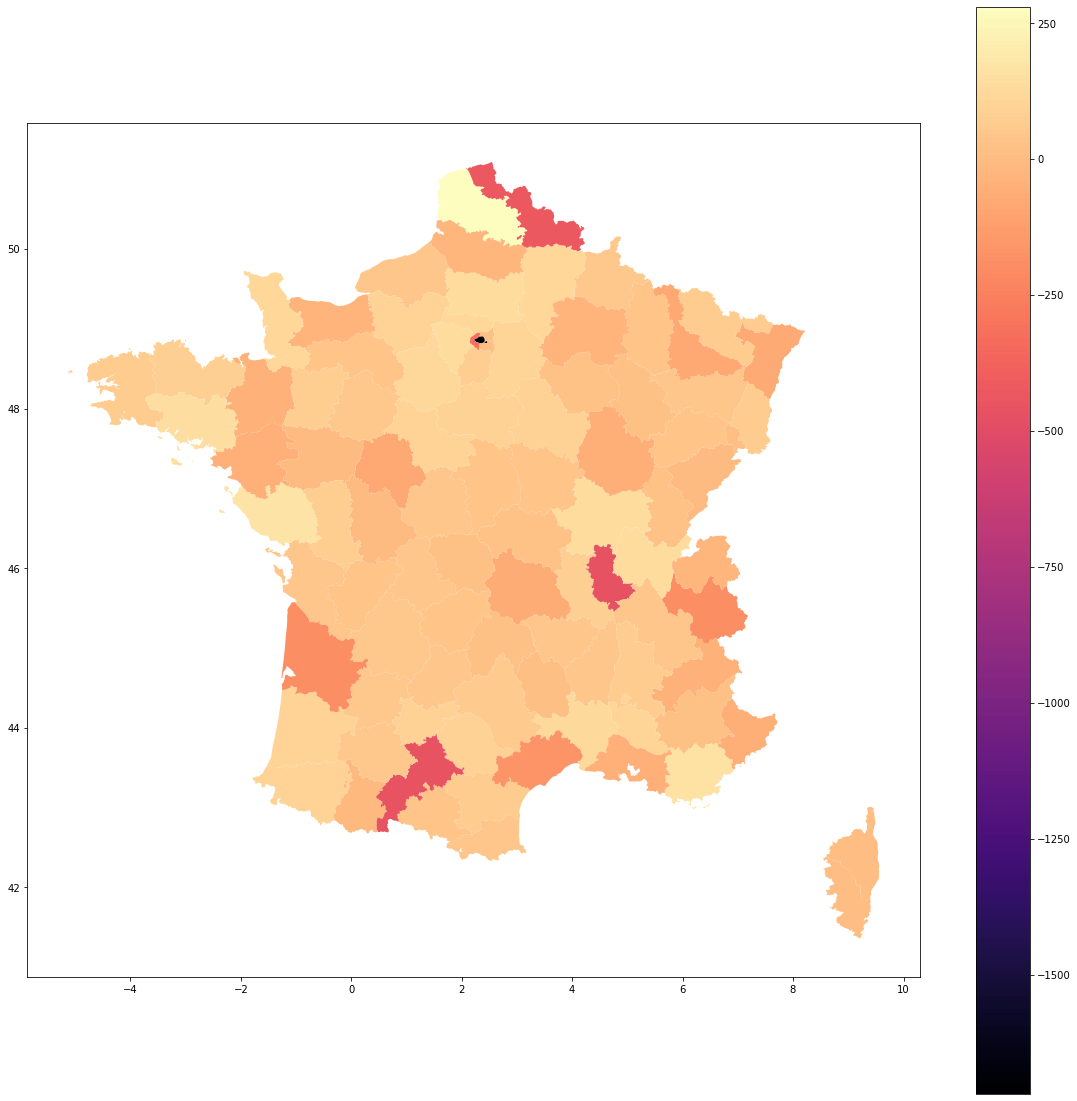

In [249]:
#example of geopandas plot
from shapely.geometry import Point
from geopandas import GeoDataFrame
import os

df = departments_df
df.plot(column='rel_number_of_arrivals', legend = True, cmap = 'magma', figsize = (20,20))

<AxesSubplot:>

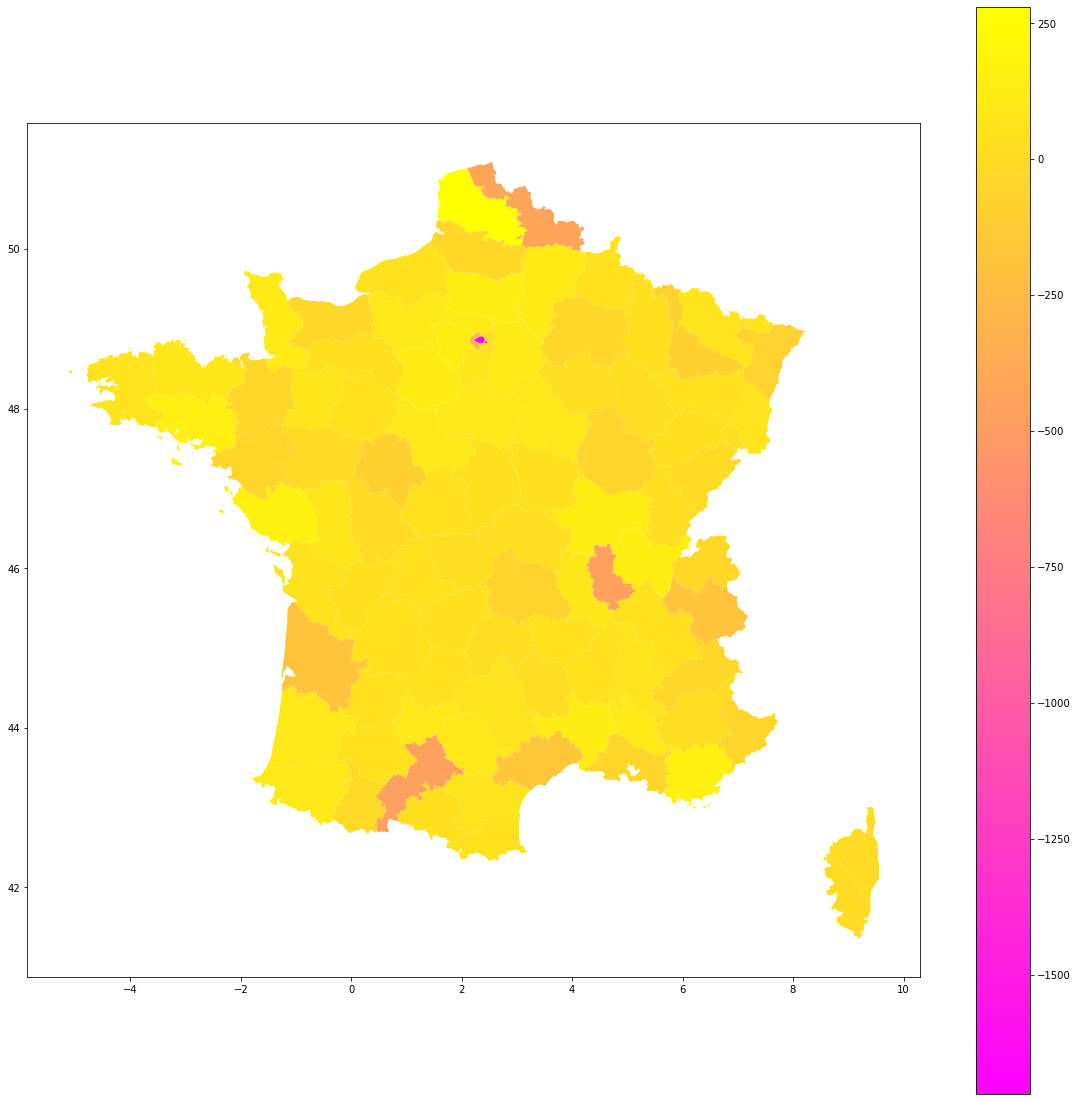

In [250]:
#example of geopandas plot
from shapely.geometry import Point
from geopandas import GeoDataFrame
import os

df = departments_df
df.plot(column='rel_number_of_arrivals', legend = True, cmap = 'spring', figsize = (20,20))

<AxesSubplot:>

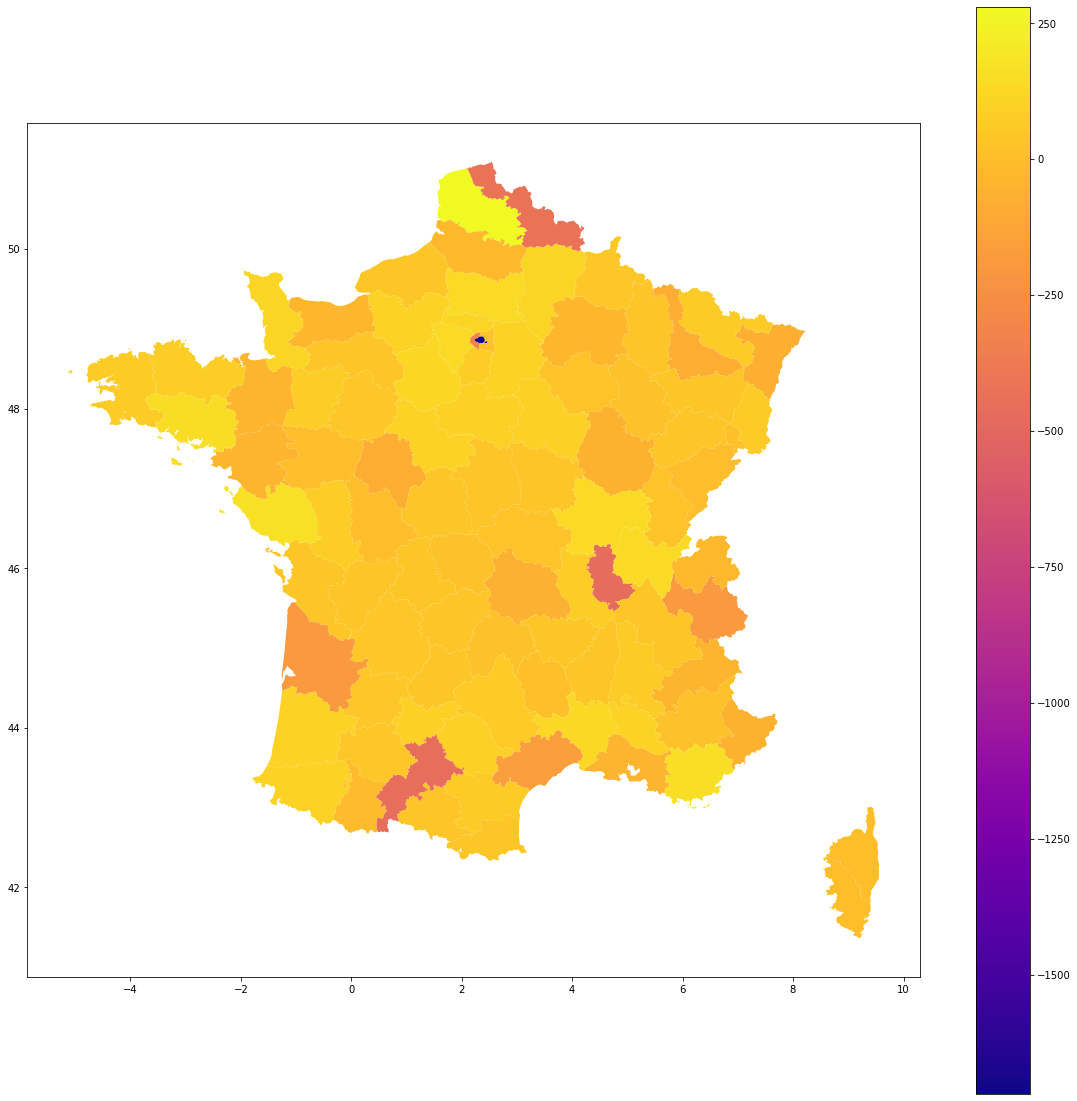

In [246]:
#example of geopandas plot
from shapely.geometry import Point
from geopandas import GeoDataFrame
import os

df = departments_df
df.plot(column='rel_number_of_arrivals', legend = True, cmap = 'plasma', figsize = (20,20))

In [251]:
departments_df['abs_number_of_arrivals'] = pd.Series()
for dep in N_per_dpt_during['main_dep_during'].unique():
    departments_df['abs_number_of_arrivals'][departments_df['nom'] == dep] = N_per_dpt_during['count'][N_per_dpt_during['main_dep_during'] == dep].values[0]
print(departments_df)

/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_33933/2867114931.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  departments_df['abs_number_of_arrivals'] = pd.Series()
/var/folders/13/d095gb7d3w707hsyf79x8q4r0000gn/T/ipykernel_33933/2867114931.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  departments_df['abs_number_of_arrivals'][departments_df['nom'] == dep] = N_per_dpt_during['count'][N_per_dpt_during['main_dep_during'] == dep].values[0]


   code                      nom  \
0    02                    Aisne   
1    10                     Aube   
2    14                 Calvados   
3    15                   Cantal   
4    28             Eure-et-Loir   
5    35          Ille-et-Vilaine   
6    39                     Jura   
7    40                   Landes   
8    42                    Loire   
9    45                   Loiret   
10   47           Lot-et-Garonne   
11   55                    Meuse   
12   61                     Orne   
13   62            Pas-de-Calais   
14   63              Puy-de-Dôme   
15   67                 Bas-Rhin   
16   68                Haut-Rhin   
17   76           Seine-Maritime   
18   89                    Yonne   
19   93        Seine-Saint-Denis   
20   04  Alpes-de-Haute-Provence   
21   05             Hautes-Alpes   
22   07                  Ardèche   
23   08                 Ardennes   
24   09                   Ariège   
25   17        Charente-Maritime   
26   19                  Cor

<AxesSubplot:>

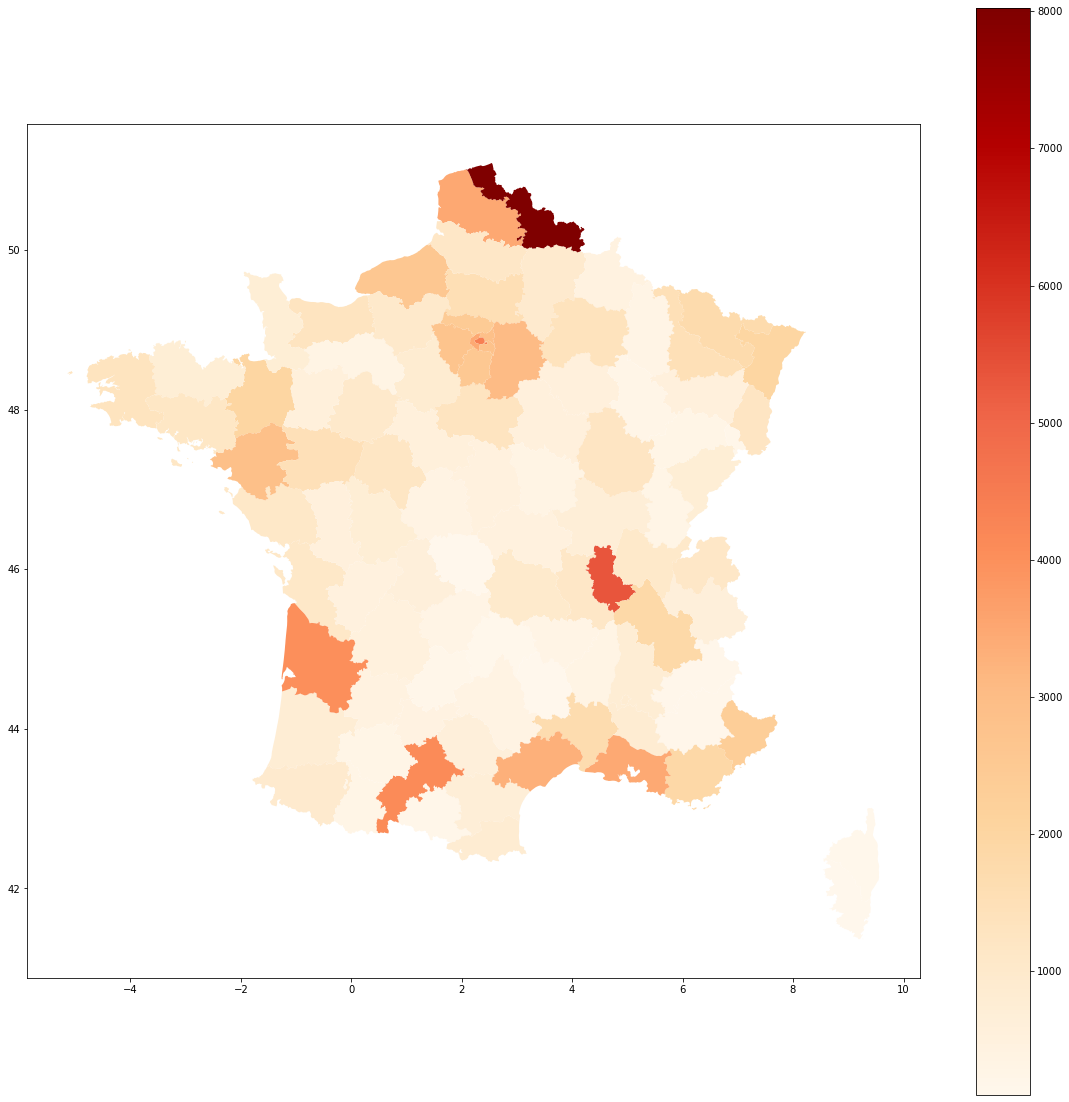

In [253]:
#example of geopandas plot
from shapely.geometry import Point
from geopandas import GeoDataFrame
import os

df = departments_df
df.plot(column='abs_number_of_arrivals', legend = True, cmap = 'OrRd', figsize = (20,20))

<AxesSubplot:>

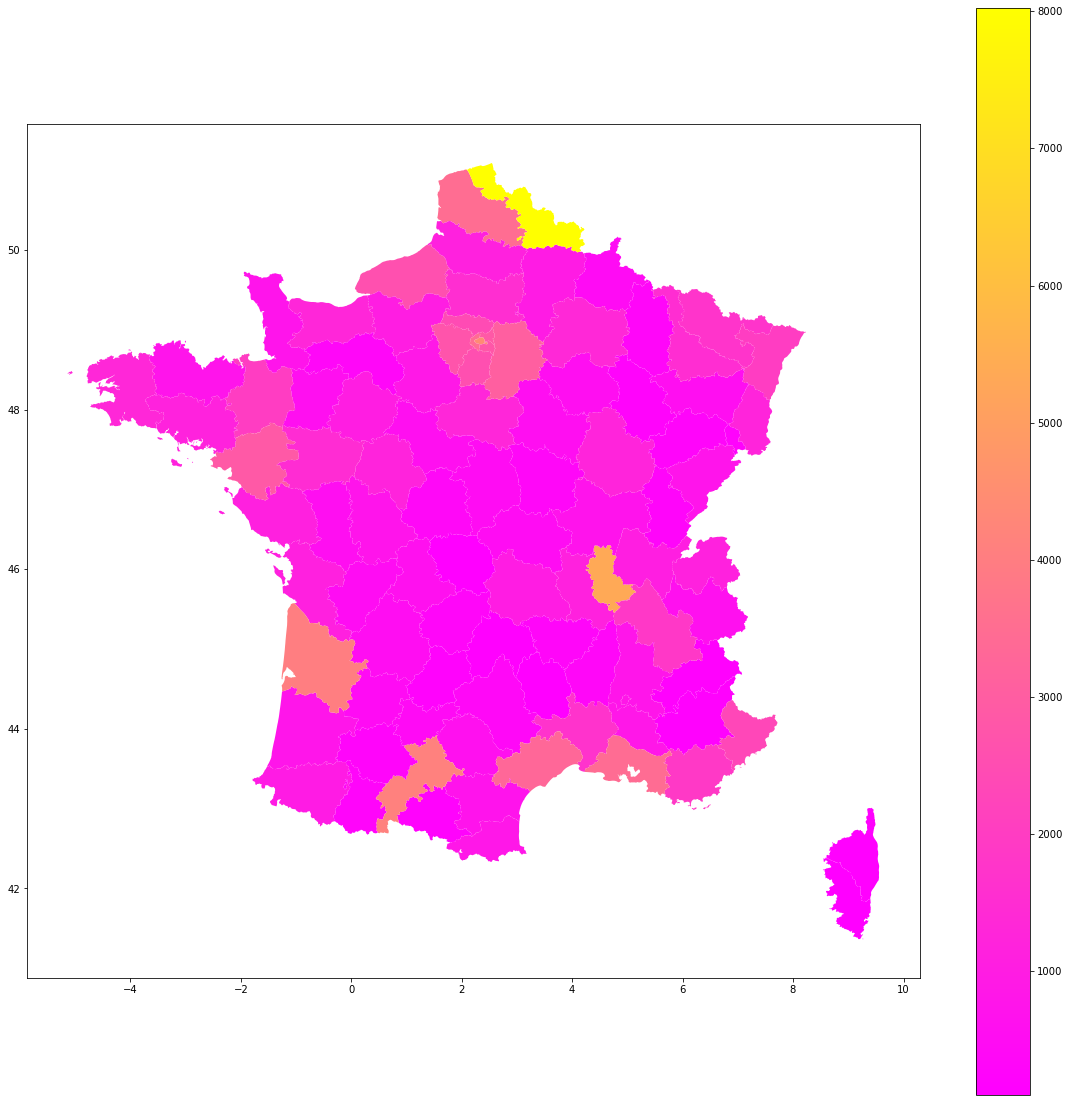

In [258]:
#example of geopandas plot
from shapely.geometry import Point
from geopandas import GeoDataFrame
import os

df = departments_df
df.plot(column='abs_number_of_arrivals', legend = True, cmap = 'spring', figsize = (20,20))